<a href="https://colab.research.google.com/github/CeciliaCTorales/misNotebooks/blob/main/An%C3%A1lisis_supervivencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Objetivos
- Comprobar las relaciones entre variables categóricas y numéricas.
- Generar visualizaciones que puedan presentar hipótesis sobre las posibilidades de supervivencia.

## Ejercicio práctico
- Cargá la base de datos “titanic” y visualizá las primeras filas.
- Realizá un análisis estadístico básico de la tasa de supervivencia por clase de pasajero.
- Creá un gráfico de barras que muestre la tasa de supervivencia por clase.
- Analizá si existe alguna correlación entre la edad de los pasajeros y su tasa de supervivencia, utilizando un diagrama de caja (box plot).



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Realizar un análisis estadístico básico de la tasa de superviviencia por clase de pasajero
titanic.groupby('pclass')['survived'].mean()
#titanic.groupby('sex')['survived'].mean()

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


In [11]:
titanic["age"].describe()

,age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


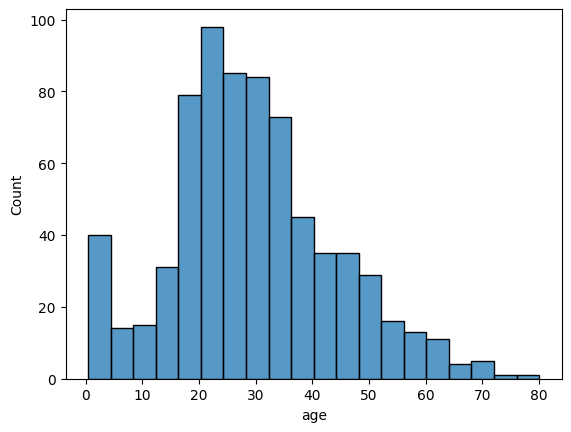

In [10]:
# Crear un histograma con la distribución de las edades
sns.histplot(x="age", data= titanic)
plt.show()

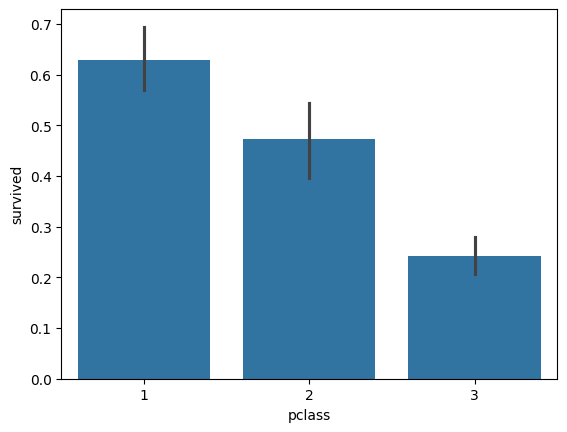

In [12]:
# Crear un gráfico de barras que muestre la tasa de supervivencia por clase
sns.barplot(x="pclass", y = "survived", data= titanic)
plt.show()

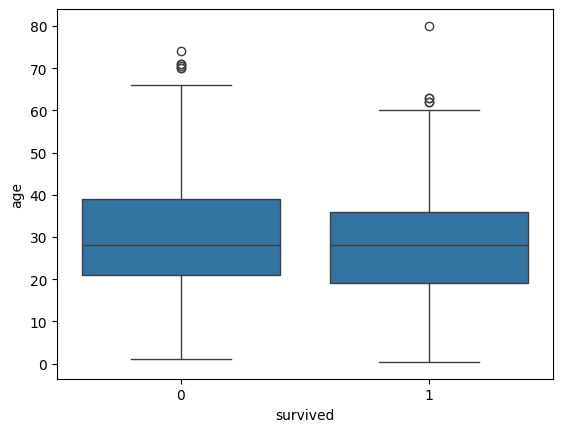

In [13]:
# Analizar si existe alguna correlación entre la edad de los pasajeros y su tasa de supervivencia
sns.boxplot(x="survived", y = "age", data=titanic)
plt.show()


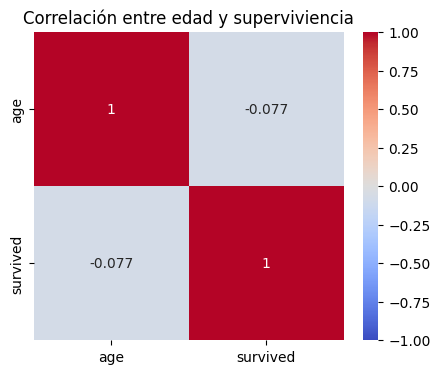

In [14]:
# Bonus track 1: análisis de correlación con un mapa de calor
corr = titanic[['age','survived']].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlación entre edad y superviviencia")
plt.show()


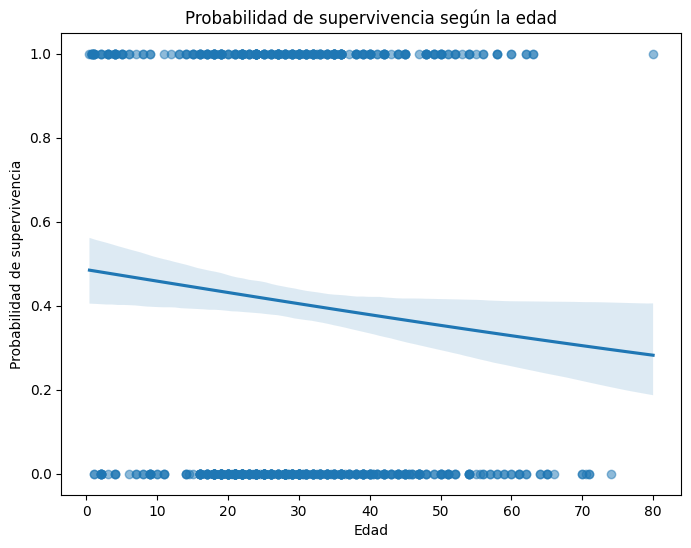

In [15]:
# Bonus track 2: Análisis de regresión logística
plt.figure(figsize=(8,6))

sns.regplot(x='age', y='survived', data=titanic, logistic=True, scatter_kws={'alpha':0.5})

plt.title('Probabilidad de supervivencia según la edad')
plt.xlabel("Edad")
plt.ylabel("Probabilidad de supervivencia")
plt.show()

In [ ]:
tasa = titanic.groupby("class")["survived"].mean().reset_index()
tasa

/tmp/ipython-input-2162500947.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasa = titanic.groupby("class")["survived"].mean().reset_index()


,class,survived
0,First,0.629630
1,Second,0.472826
2,Third,0.242363
